# Plotting from geotables

In [11]:
%matplotlib inline

In [12]:
import pysal as ps
import numpy as np
from pysal.contrib import pdio
from pysal.contrib.viz import mapping as maps
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import pandas as pd

In [13]:
ps.examples.available()

['10740',
 'arcgis',
 'baltim',
 'book',
 'burkitt',
 'calemp',
 'chicago',
 'columbus',
 'desmith',
 'geodanet',
 'juvenile',
 'Line',
 'mexico',
 'nat',
 'networks',
 'newHaven',
 'Point',
 'Polygon',
 'sacramento2',
 'sids2',
 'snow_maps',
 'south',
 'stl',
 'street_net_pts',
 'taz',
 'us_income',
 'virginia',
 'wmat']

In [23]:
db = pdio.read_files(ps.examples.get_path('columbus.shp'))
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 21 columns):
AREA          49 non-null float64
PERIMETER     49 non-null float64
COLUMBUS_     49 non-null int64
COLUMBUS_I    49 non-null int64
POLYID        49 non-null int64
NEIG          49 non-null int64
HOVAL         49 non-null float64
INC           49 non-null float64
CRIME         49 non-null float64
OPEN          49 non-null float64
PLUMB         49 non-null float64
DISCBD        49 non-null float64
X             49 non-null float64
Y             49 non-null float64
NSA           49 non-null float64
NSB           49 non-null float64
EW            49 non-null float64
CP            49 non-null float64
THOUS         49 non-null float64
NEIGNO        49 non-null float64
geometry      49 non-null object
dtypes: float64(16), int64(4), object(1)
memory usage: 8.1+ KB


In [ ]:
type(db.geometry[0])

## `matplotlib` interface

In [ ]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
pal = sns.xkcd_palette(colors)

colors = np.array(pal)[np.random.random_integers(0, high=len(pal)-1, size=db.shape[0])]
colors = pd.Series(colors.tolist(), index=db.index)

In [21]:
d

{'Box_Plot': pysal.esda.mapclassify.Box_Plot,
 'Equal_Interval': pysal.esda.mapclassify.Equal_Interval,
 'Fisher_Jenks': pysal.esda.mapclassify.Fisher_Jenks,
 'Fisher_Jenks_Sampled': pysal.esda.mapclassify.Fisher_Jenks_Sampled,
 'HeadTail_Breaks': pysal.esda.mapclassify.HeadTail_Breaks,
 'Jenks_Caspall': pysal.esda.mapclassify.Jenks_Caspall,
 'Jenks_Caspall_Forced': pysal.esda.mapclassify.Jenks_Caspall_Forced,
 'Jenks_Caspall_Sampled': pysal.esda.mapclassify.Jenks_Caspall_Sampled,
 'K_classifiers': pysal.esda.mapclassify.K_classifiers,
 'Map_Classifier': pysal.esda.mapclassify.Map_Classifier,
 'Max_P_Classifier': pysal.esda.mapclassify.Max_P_Classifier,
 'Maximum_Breaks': pysal.esda.mapclassify.Maximum_Breaks,
 'Natural_Breaks': pysal.esda.mapclassify.Natural_Breaks,
 'Percentiles': pysal.esda.mapclassify.Percentiles,
 'Quantiles': pysal.esda.mapclassify.Quantiles,
 'Std_Mean': pysal.esda.mapclassify.Std_Mean,
 'User_Defined': pysal.esda.mapclassify.User_Defined}

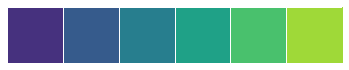

In [56]:
pltt = sns.color_palette('viridis', 6)
sns.palplot(pltt)

In [57]:
reload(maps);
y = db['HOVAL']
fj = maps.value_classifier(y, 'percentiles')
fj = fj.map({i:j for i,j in enumerate(pltt)})
fj.head()

0    (0.288921, 0.758394, 0.428426)
1    (0.122312, 0.633153, 0.530398)
2       (0.153364, 0.497, 0.557724)
3       (0.153364, 0.497, 0.557724)
4       (0.153364, 0.497, 0.557724)
dtype: object

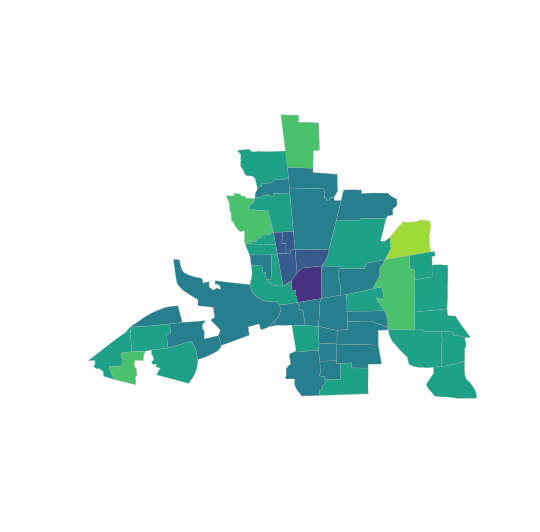

In [58]:
reload(maps);

maps.plot_geocol_mpl(db.loc[:, 'geometry'], facecolor=fj)

## `bokeh` interface

In [4]:
from bokeh.models import HoverTool
from bokeh.palettes import Viridis6
from bokeh.plotting import figure, show, output_file, output_notebook, ColumnDataSource
from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.unemployment import data as unemployment

output_notebook()

Loading BokehJS ...

In [10]:
reload(maps)

maps.plot_geocol_bk(db['geometry'], marker_size=10, hover=True)

In [6]:
gc = db['geometry']
patch_xs = []
patch_ys = []
ids = []
for id, shape in gc.iteritems():
    for ring in shape.parts:
        xs, ys = zip(*ring)
        patch_xs.append(xs)
        patch_ys.append(ys)
        ids.append(id)
cds = ColumnDataSource(data=dict(
            x=patch_xs,
            y=patch_ys
            ))

In [8]:
TOOLS="pan,wheel_zoom,box_zoom,reset,hover"
p = figure(tools=TOOLS, x_axis_location=None, y_axis_location=None)
p.grid.grid_line_color = None

p.patches('x', 'y', source=cds,
  fill_alpha=1.,
  line_color='black', 
  line_width=0.5
  )

show(p)

In [ ]:
reload(maps);

maps.plot_geocol_bk(db.loc[:, 'geometry'], linewidth=10)

In [ ]:
db = pdio.read_files(ps.examples.get_path('columbus.shp'))
db